In [11]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive

In [12]:
#path = '/content/accenture/dataset.xlsx'
#data = pd.read_excel(path, na_values=' ?')

drive.mount('/content/drive')

path = "/content/drive/My Drive/accenture/Intern_Challenge_2/Copia_dataset.xlsx"
data = pd.read_excel(path)
data.columns = ['Bank_Name', 'Emotio_AI_Score', 'Title_Review', 'Experience_Themes']


data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Bank_Name,Emotio_AI_Score,Title_Review,Experience_Themes
0,Bank_4,NaN,A sudden close of my current account without b...,Account Management by Customer
1,Bank_4,NaN,"Very good service Very good service, they are ...",Customer Service
2,Bank_4,NaN,"Excellent, easy , and fast Excellent, easy and...",User Interface
3,Bank_4,NaN,Had help from Holly at the Nottinghamâ€¦ Had h...,Customer Service
4,Bank_4,NaN,I have been a customer for 30 plusâ€¦ I have b...,Customer Service
...,...,...,...,...
31409,Bank_2,NaN,Love it so easy,User Interface
31410,Bank_2,NaN,Easy to use and set up new payee's.,User Interface
31411,Bank_2,NaN,It's very reliable and does what it needs to. ...,Update Issues
31412,Bank_2,NaN,When have disability this is best way its hard...,Others


In [13]:
data.shape

(31414, 4)

In [14]:
data.dtypes

Bank_Name             object
Emotio_AI_Score      float64
Title_Review          object
Experience_Themes     object
dtype: object

In [15]:
data.mode()

,Bank_Name,Emotio_AI_Score,Title_Review,Experience_Themes
0,Bank_3,5.0,Good,Others


In [16]:
data.isnull().sum()

Bank_Name                0
Emotio_AI_Score      22949
Title_Review             1
Experience_Themes        0
dtype: int64

In [17]:
(data.isnull().sum()/len(data))*100

Bank_Name             0.000000
Emotio_AI_Score      73.053416
Title_Review          0.003183
Experience_Themes     0.000000
dtype: float64

In [18]:
data.describe()

,Emotio_AI_Score
count,8465.000000
mean,4.295688
std,1.394819
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


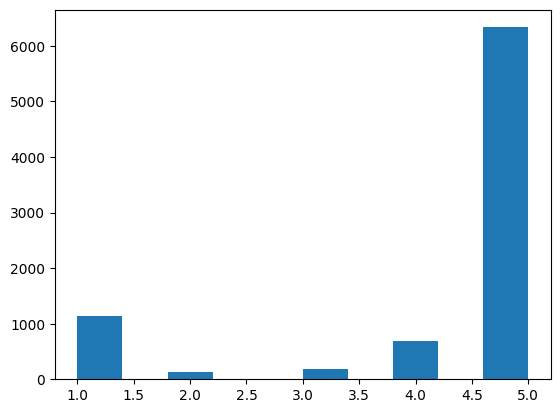

In [19]:
plt.hist(data["Emotio_AI_Score"])
plt.show()


Cantidad Null o NaN por registros

In [20]:
print('Cantidad máxima faltante por registros: ', max(data.isnull().sum(axis=1)))

Cantidad máxima faltante por registros:  2


In [21]:
print('Cantidad de registros con datos faltantes: ', len(data[data.isnull().any(1)]))
print('Porcentaje con base al dataset: ', round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')


dos = data [( data.Emotio_AI_Score.isnull() & data.Title_Review.isnull() ) ]
print('\nCantidad de registros con 2 datos faltantes: ', len(dos))
print('Porcentaje en el dataset:', round(((len(dos)/ len(data))*100),4),'%')


faltantes1 = data [(data.Emotio_AI_Score.isnull() & data.Title_Review.notnull() ) ]
uno = len(faltantes1)
print('\nCantidad de registros con 1 dato faltante (Emotio AI Score):', uno)
print('Porcentaje con base al dataset: ', round(((uno/ len(data))*100), 3),'%')
print('Registros totales: ', len(data),'\n')


Cantidad de registros con datos faltantes:  22949
Porcentaje con base al dataset:  73.05 %

Cantidad de registros con 2 datos faltantes:  1
Porcentaje en el dataset: 0.0032 %

Cantidad de registros con 1 dato faltante (Emotio AI Score): 22948
Porcentaje con base al dataset:  73.05 %
Registros totales:  31414 



<ipython-input-21-07a2ff54f01b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Cantidad de registros con datos faltantes: ', len(data[data.isnull().any(1)]))
<ipython-input-21-07a2ff54f01b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Porcentaje con base al dataset: ', round((len(data[data.isnull().any(1)])/ len(data))*100,2),'%')


## Datos Atípicos

Datos Atípicos por atributos numéricos

In [22]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna
lista=[]
indices = []
numericas=['Emotio_AI_Score']

for i in numericas:
    Q3, Q1 = np. percentile (data[i], [75, 25])
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR
    lista.append(len(data[(data[i]< lim_inf) | (data[i] >lim_sup)]))
    indices.append(data[(data[i]< lim_inf) | (data[i] >lim_sup)].index)

for i in range ( len(numericas) ):
   print("La cantidad de datos atípicos en", data.columns[i], "son", lista[i], "con un porcentaje del", round((lista[i]/len(data))*100, 2) )

La cantidad de datos atípicos en Bank_Name son 0 con un porcentaje del 0.0


In [23]:
import itertools
lista = list(itertools.chain(*indices))
lista.sort()
cantidad =list(map(lambda x: lista.count(x),lista))
lista2=[]
lista3=[]

for i in range(len(cantidad)):
  if cantidad[i] == 2:
    lista2.append(lista[i])
  if cantidad[i]== 3:
    lista3.append(lista[i])

print("Hay ",len(pd.unique(lista2)),"registros que tienen 2 datos atípicos")
print("Porcentaje: ",round((len(pd.unique(lista2))/len(data))*100, 4),"%")
print("Hay ",len(pd.unique(lista3)),"registros que tienen 3 datos atípicos")
print("Porcentaje: ",round((len(pd.unique(lista3))/len(data))*100, 4),"%")
print("Si eliminamos de 2 y 3 datos atípicos representa un", round(((len(pd.unique(lista3))+ len(pd.unique(lista2)))/len(data))*100, 4),"%")
lista2.extend(lista3)
lista2 = pd.unique(lista2)
print("Que serían:",len(lista2),"datos")



Hay  0 registros que tienen 2 datos atípicos
Porcentaje:  0.0 %
Hay  0 registros que tienen 3 datos atípicos
Porcentaje:  0.0 %
Si eliminamos de 2 y 3 datos atípicos representa un 0.0 %
Que serían: 0 datos


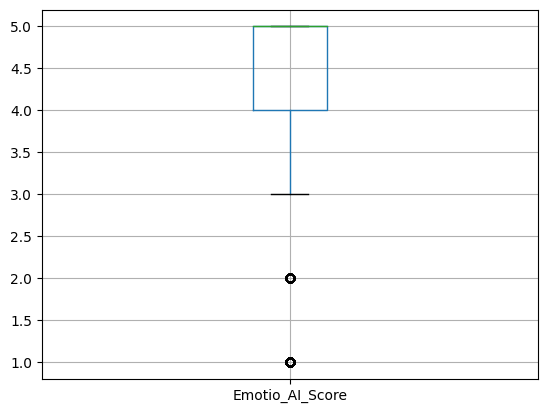

In [24]:
data.boxplot(column=['Emotio_AI_Score'])
plt.show()

<ipython-input-25-851740af915e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square=True, annot=True, ax=ax,fmt=".1g")


<Axes: >

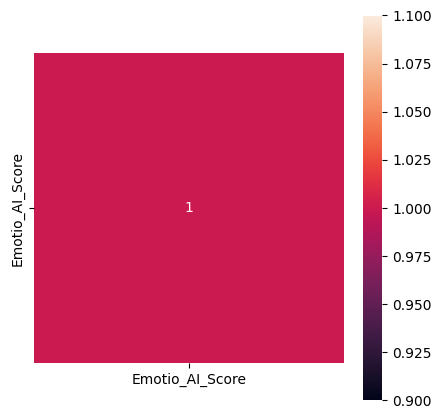

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(data.corr(), square=True, annot=True, ax=ax,fmt=".1g")

## Analisis de Sentimiento

In [26]:
#!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('cess_esp')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
data['Title_Review'].unique()

array(['A sudden close of my current account without being notified While the opening of the account was easy, I had a very unhappy ending with Comp_4.  I have filed a complaint and hope that they will really investigate into it and give me a proper answer.  Because of COVID, I went back to my home country and is not able to travel back to U.K. where my grown up children live.  My debit card expired so I asked Comp_4 to send me a new one.  On its mobile banking, it clearly said that they can send debit cards overseas.  I gave them my current country to send to.  Then I received a letter from them saying they do not accommodate any account holders who reside overseas, so they will be closing my account by so and so date.  I called them before that date and explained why I was not currently in U.K.  The officer that I talked to told me to ignore the account closing date for now as they will consider my case and let me know the result.  I called again few weeks after that call and was ask

In [28]:
from textblob import TextBlob

data['Title_Review'] = data['Title_Review'].astype(str)

# Define function to get sentiment polarity
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply function to Title_Review column
data['Sentiment_Polarity'] = data['Title_Review'].apply(get_polarity)

# Print first five rows with sentiment polarity
data.head()

,Bank_Name,Emotio_AI_Score,Title_Review,Experience_Themes,Sentiment_Polarity
0,Bank_4,NaN,A sudden close of my current account without b...,Account Management by Customer,-0.014405
1,Bank_4,NaN,"Very good service Very good service, they are ...",Customer Service,0.673333
2,Bank_4,NaN,"Excellent, easy , and fast Excellent, easy and...",User Interface,0.613333
3,Bank_4,NaN,Had help from Holly at the Nottinghamâ€¦ Had h...,Customer Service,0.133333
4,Bank_4,NaN,I have been a customer for 30 plusâ€¦ I have b...,Customer Service,0.087500


En **TextBlob, la escala de polarity va de -1 a 1**, donde los valores negativos indican sentimientos negativos, valores cercanos a cero indican neutralidad y valores positivos indican sentimientos positivos. 

In [29]:
# hacer un conteo de reseñas positivas, negativas y neutrales
pos_reviews = len(data[data['Sentiment_Polarity'] > 0])
neg_reviews = len(data[data['Sentiment_Polarity'] < 0])
neu_reviews = len(data[data['Sentiment_Polarity'] == 0])
total_reviews = len(data)

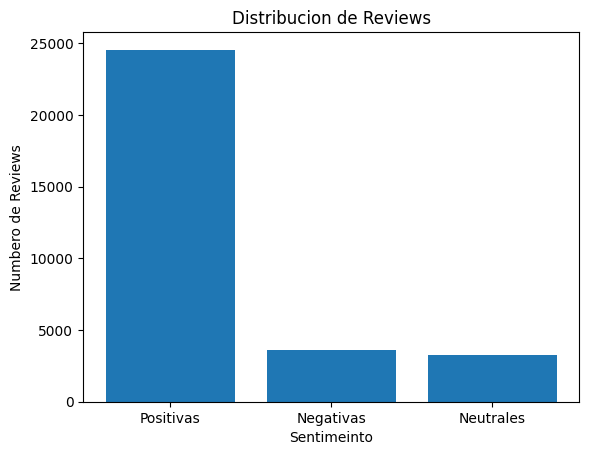

Reseñas Positivas:  24560 -> 78.18 % de la data
Reseñas Negativas:  3578 -> 11.39 % de la data
Reseñas Neutrales:  3276 -> 10.43 % de la data
Número total de reseñas:  31414


In [30]:
# Análisis de sentimiento por tema
sentiment_by_theme = data.groupby('Experience_Themes')['Sentiment_Polarity'].mean()
# Gráfico de barras de las reseñas positivas, negativas y neutrales
labels = ['Positivas', 'Negativas', 'Neutrales']
values = [pos_reviews, neg_reviews, neu_reviews]
plt.bar(labels, values)
plt.title('Distribucion de Reviews')
plt.xlabel('Sentimeinto')
plt.ylabel('Numbero de Reviews')
plt.show()



print("Reseñas Positivas: ", pos_reviews, '->', round( ( pos_reviews/len(data['Sentiment_Polarity']) ) *100, 2 ), "% de la data" )
print("Reseñas Negativas: ", neg_reviews, '->', round( ( neg_reviews/len(data['Sentiment_Polarity']) ) *100, 2 ), "% de la data" )
print("Reseñas Neutrales: ", neu_reviews, '->', round( ( neu_reviews/len(data['Sentiment_Polarity']) ) *100, 2 ), "% de la data" )
print('Número total de reseñas: ', total_reviews)


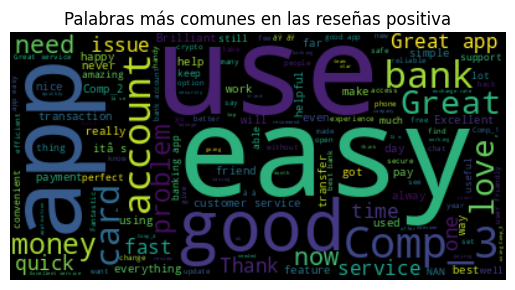

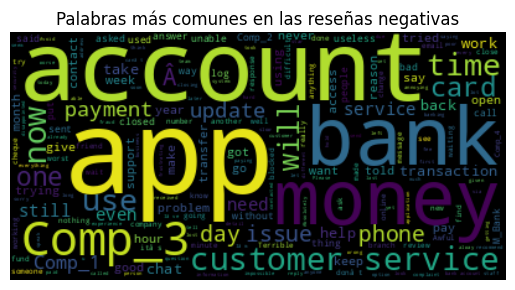

In [31]:
from wordcloud import WordCloud

# Mapa de calor de las palabras más comunes en las reseñas positivas
text = ' '.join(data[data['Sentiment_Polarity'] > 0]['Title_Review'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más comunes en las reseñas positiva')
plt.show()

# Mapa de calor de las palabras más comunes en las reseñas negativas
text = ' '.join(data[data['Sentiment_Polarity'] < 0]['Title_Review'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más comunes en las reseñas negativas')
plt.show()


In [32]:
data['Experience_Themes'].unique()

array(['Account Management by Customer', 'Customer Service',
       'User Interface', 'App Stability', 'Update Issues', '24*7 Support',
       'Customer Onboarding', 'Account Management by Bank',
       'Payments and Transactions', 'Offers', 'Connectivity Issues',
       'Account Safety', 'Fraud and Thefts', 'International Usage',
       'Grievance Redressal', 'Others'], dtype=object)

In [33]:
# Análisis de sentimiento por tema específico
themes = data['Experience_Themes'].unique()

for theme in themes:
    theme_data = data[data['Experience_Themes'] == theme]
    theme_pos = len(theme_data[theme_data['Sentiment_Polarity'] > 0])
    theme_neg = len(theme_data[theme_data['Sentiment_Polarity'] < 0])
    theme_neu = len(theme_data[theme_data['Sentiment_Polarity'] == 0])
    
    # Imprimir los resultados para cada tema
    print(f'Theme: {theme}')
    print(f'Reseñas Positivos: {theme_pos}')
    print(f'Reseñas Negativos: {theme_neg}')
    print(f'Reseñas Neutros: {theme_neu}\n')

Theme: Account Management by Customer
Reseñas Positivos: 621
Reseñas Negativos: 168
Reseñas Neutros: 33

Theme: Customer Service
Reseñas Positivos: 3718
Reseñas Negativos: 763
Reseñas Neutros: 419

Theme: User Interface
Reseñas Positivos: 5156
Reseñas Negativos: 122
Reseñas Neutros: 66

Theme: App Stability
Reseñas Positivos: 1330
Reseñas Negativos: 694
Reseñas Neutros: 368

Theme: Update Issues
Reseñas Positivos: 454
Reseñas Negativos: 251
Reseñas Neutros: 165

Theme: 24*7 Support
Reseñas Positivos: 1387
Reseñas Negativos: 107
Reseñas Neutros: 125

Theme: Customer Onboarding
Reseñas Positivos: 468
Reseñas Negativos: 203
Reseñas Neutros: 76

Theme: Account Management by Bank
Reseñas Positivos: 470
Reseñas Negativos: 112
Reseñas Neutros: 19

Theme: Payments and Transactions
Reseñas Positivos: 1176
Reseñas Negativos: 234
Reseñas Neutros: 115

Theme: Offers
Reseñas Positivos: 128
Reseñas Negativos: 11
Reseñas Neutros: 11

Theme: Connectivity Issues
Reseñas Positivos: 81
Reseñas Negativos:

## Analisis de sentimiento por Bancos

In [34]:
# Agrupar los datos por banco
grouped_data = data.groupby('Bank_Name')

resultados = []
# Análisis de sentimiento por tema y por banco
for bank_name, group in grouped_data:
    print(f'========== Banco: {bank_name}', '==========')
    themes = group['Experience_Themes'].unique()
    for theme in themes:
      theme_data = data[data['Experience_Themes'] == theme]
      theme_pos = len(theme_data[theme_data['Sentiment_Polarity'] > 0])
      theme_neg = len(theme_data[theme_data['Sentiment_Polarity'] < 0])
      theme_neu = len(theme_data[theme_data['Sentiment_Polarity'] == 0])
      resultados.append([bank_name, theme, theme_pos, theme_neg, theme_neu])
      
      # Imprimir los resultados para cada tema
      print(f'Theme: {theme}')
      print(f'Reseñas Positivos: {theme_pos}')
      print(f'Reseñas Negativos: {theme_neg}')
      print(f'Reseñas Neutros: {theme_neu}\n')


========== Banco: Bank_1 ==========
Theme: 24*7 Support
Reseñas Positivos: 1387
Reseñas Negativos: 107
Reseñas Neutros: 125

Theme: Customer Onboarding
Reseñas Positivos: 468
Reseñas Negativos: 203
Reseñas Neutros: 76

Theme: Offers
Reseñas Positivos: 128
Reseñas Negativos: 11
Reseñas Neutros: 11

Theme: Customer Service
Reseñas Positivos: 3718
Reseñas Negativos: 763
Reseñas Neutros: 419

Theme: Connectivity Issues
Reseñas Positivos: 81
Reseñas Negativos: 39
Reseñas Neutros: 20

Theme: Update Issues
Reseñas Positivos: 454
Reseñas Negativos: 251
Reseñas Neutros: 165

Theme: Payments and Transactions
Reseñas Positivos: 1176
Reseñas Negativos: 234
Reseñas Neutros: 115

Theme: App Stability
Reseñas Positivos: 1330
Reseñas Negativos: 694
Reseñas Neutros: 368

Theme: Account Management by Customer
Reseñas Positivos: 621
Reseñas Negativos: 168
Reseñas Neutros: 33

Theme: Account Management by Bank
Reseñas Positivos: 470
Reseñas Negativos: 112
Reseñas Neutros: 19

Theme: Account Safety
Reseñas

## Exportamos los resultados a un excel para subirlo a Looker Studio

In [35]:
# Crear un dataframe con los resultados
columns = ['bank_name', 'theme', 'positive_reviews', 'negative_reviews', 'neutral_reviews']
resultadosDataFrame = pd.DataFrame(resultados, columns=columns)

# Exportar a un archivo CSV
resultadosDataFrame.to_csv('sentiment_analysis_results_2.csv', index=False)
